Nicole Imoru
221125414

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn
theme = 'seismic'
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')


In [3]:
#what does that data look like
df.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [4]:
#checking data types, and looking for missing values, looks all good
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [5]:
#changing Transaction Date and Time	to date time 
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])


In [6]:
#checking to see if it worked 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  int64         
 1   Customer ID                  10000 non-null  int64         
 2   Transaction Amount           10000 non-null  float64       
 3   Transaction Date and Time    10000 non-null  datetime64[ns]
 4   Merchant Category            10000 non-null  object        
 5   Location                     10000 non-null  object        
 6   Previous Transaction Amount  10000 non-null  float64       
 7   Time Since Last Transaction  10000 non-null  float64       
 8   Device Type                  10000 non-null  object        
 9   Fraud                        10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 781.4+ KB


In [7]:
#looking at fraud and not fraud independently 
Fraud_y = df[df['Fraud']=="Yes"]
Fraud_n = df[df['Fraud']=="No"]

In [8]:
#looking at new data frames: 
Fraud_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 13 to 9995
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               1392 non-null   int64         
 1   Customer ID                  1392 non-null   int64         
 2   Transaction Amount           1392 non-null   float64       
 3   Transaction Date and Time    1392 non-null   datetime64[ns]
 4   Merchant Category            1392 non-null   object        
 5   Location                     1392 non-null   object        
 6   Previous Transaction Amount  1392 non-null   float64       
 7   Time Since Last Transaction  1392 non-null   float64       
 8   Device Type                  1392 non-null   object        
 9   Fraud                        1392 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [9]:
Fraud_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8608 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               8608 non-null   int64         
 1   Customer ID                  8608 non-null   int64         
 2   Transaction Amount           8608 non-null   float64       
 3   Transaction Date and Time    8608 non-null   datetime64[ns]
 4   Merchant Category            8608 non-null   object        
 5   Location                     8608 non-null   object        
 6   Previous Transaction Amount  8608 non-null   float64       
 7   Time Since Last Transaction  8608 non-null   float64       
 8   Device Type                  8608 non-null   object        
 9   Fraud                        8608 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 739.8+ KB


In [10]:
#inspecting the data set 
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,2023-01-04 11:19:30,461.410984,677.040726
min,1.00000,1000.000000,1.000000,2023-01-01 00:00:00,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,2023-01-02 17:39:45,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,2023-01-04 11:19:30,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,2023-01-06 04:59:15,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,2023-01-07 22:39:00,1500.000000,1694.715674
std,2886.89568,1152.371939,399.984400,NaN,334.582413,432.386769


In [11]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


Looking at the Categorical Variables

In [12]:
#looking at the categoical variable breakdown 
Merchant_distribution = df.groupby(['Fraud','Merchant Category']).size().unstack(fill_value=0)
Merchant_distribution_percentage = Merchant_distribution.div(Merchant_distribution.sum(axis=1), axis=0) * 100
print(Merchant_distribution_percentage)

Merchant Category   Clothing     Dining  Electronics  Groceries     Travel
Fraud                                                                     
No                 20.364777  20.782993    19.458643  19.853625  19.539963
Yes                21.479885  20.689655    20.114943  19.683908  18.031609


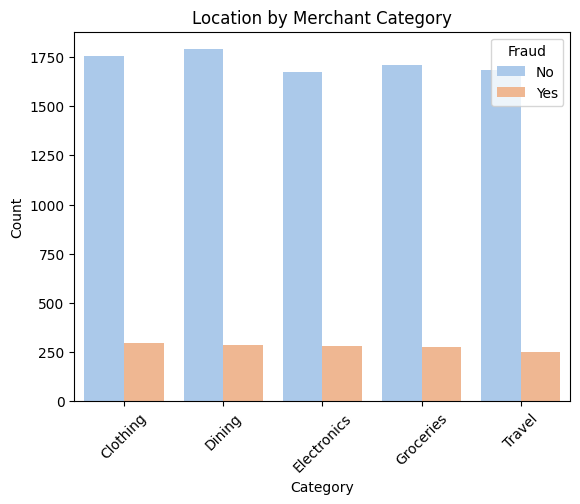

In [13]:
#not seeing a significant difference between them, it is spread evenly
sns.countplot( x="Merchant Category", hue="Fraud", data=df, palette='pastel')
plt.title("Location by Merchant Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [14]:
#looking at the categoical variable breakdown 
customer_distribution = df.groupby(['Fraud','Customer ID']).size().unstack(fill_value=0)
customer_distribution_percentage = customer_distribution.div(customer_distribution.sum(axis=1), axis=0) * 100
print(customer_distribution_percentage)

Customer ID      1000      1001      1002      1003      1004      1005  \
Fraud                                                                     
No           0.011617  0.034851  0.023234  0.011617  0.011617  0.023234   
Yes          0.000000  0.143678  0.000000  0.000000  0.000000  0.000000   

Customer ID      1006      1007      1009      1010  ...      4990      4991  \
Fraud                                                ...                       
No           0.011617  0.034851  0.058086  0.023234  ...  0.023234  0.034851   
Yes          0.000000  0.000000  0.000000  0.071839  ...  0.000000  0.071839   

Customer ID      4992      4993      4994      4995      4996      4997  \
Fraud                                                                     
No           0.023234  0.058086  0.046468  0.011617  0.046468  0.011617   
Yes          0.071839  0.000000  0.000000  0.000000  0.071839  0.000000   

Customer ID      4998      4999  
Fraud                            
No       

<Axes: xlabel='Customer ID', ylabel='Count'>

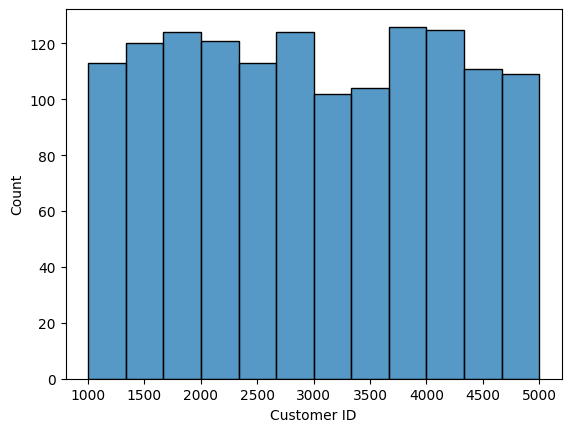

In [15]:
sns.histplot (x=Fraud_y['Customer ID'])


<Axes: xlabel='Customer ID', ylabel='Count'>

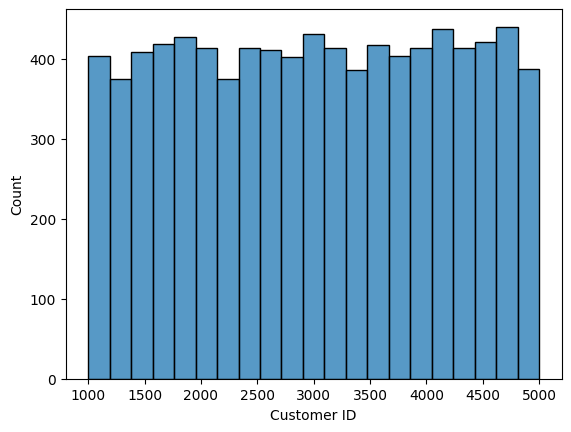

In [16]:
sns.histplot (x=Fraud_n['Customer ID'])


So it looks as if there are specifc customers that commit fraud. this could help us in the model 

In [17]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [18]:
#looking at the categoical variable breakdown 
loc_distribution = df.groupby(['Fraud','Location']).size().unstack(fill_value=0)
loc_distribution_percentage = loc_distribution.div(loc_distribution.sum(axis=1), axis=0) * 100
print(loc_distribution_percentage)

Location    Chicago    Houston  Los Angeles   New York  San Francisco
Fraud                                                                
No        19.830390  20.051115    20.608736  19.365706      20.144052
Yes       14.942529  46.479885    13.074713  14.295977      11.206897


Location is huge, there are really high instances of fraud in houston, so location should go into the model 

<Axes: xlabel='Location', ylabel='Count'>

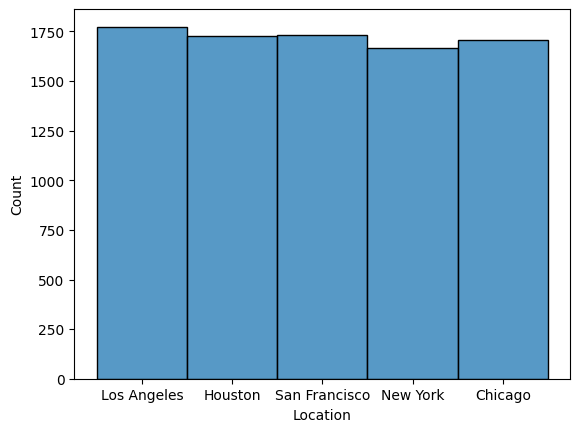

In [19]:
sns.histplot (x=Fraud_n['Location'])


<Axes: xlabel='Location', ylabel='Count'>

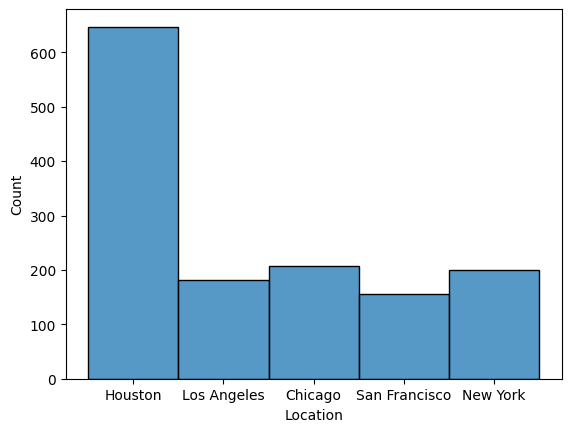

In [20]:
sns.histplot (x=Fraud_y['Location'])

In [21]:
#looking at the categoical variable breakdown 
dec_distribution = df.groupby(['Fraud','Device Type']).size().unstack(fill_value=0)
dec_distribution_percentage = dec_distribution.div(dec_distribution.sum(axis=1), axis=0) * 100
print(dec_distribution_percentage)

Device Type    desktop     mobile
Fraud                            
No           50.778346  49.221654
Yes          51.005747  48.994253


<Axes: xlabel='Device Type', ylabel='Count'>

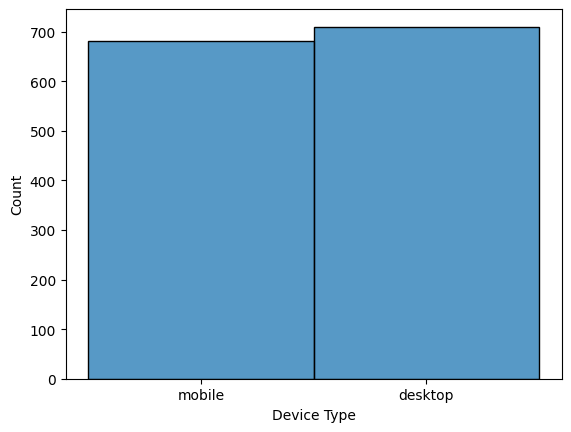

In [22]:
sns.histplot (x=Fraud_y['Device Type'])

<Axes: xlabel='Device Type', ylabel='Count'>

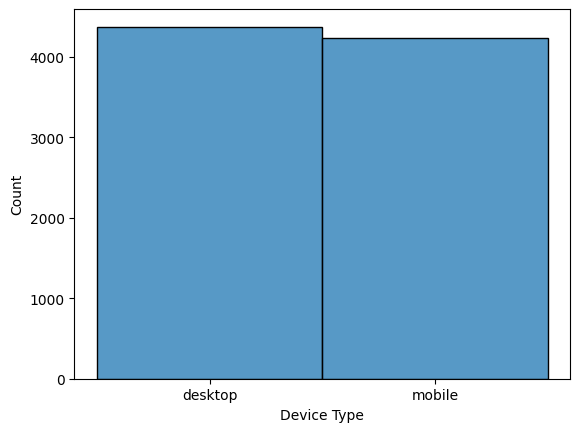

In [23]:
sns.histplot (x=Fraud_n['Device Type'])

device is basically the same, so I'm going to ignore it 

Looking at continous variables 

In [24]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


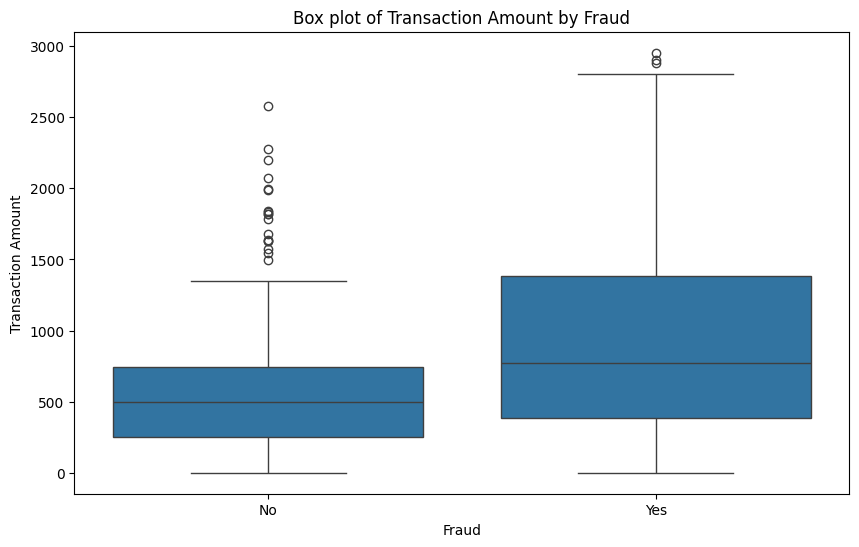

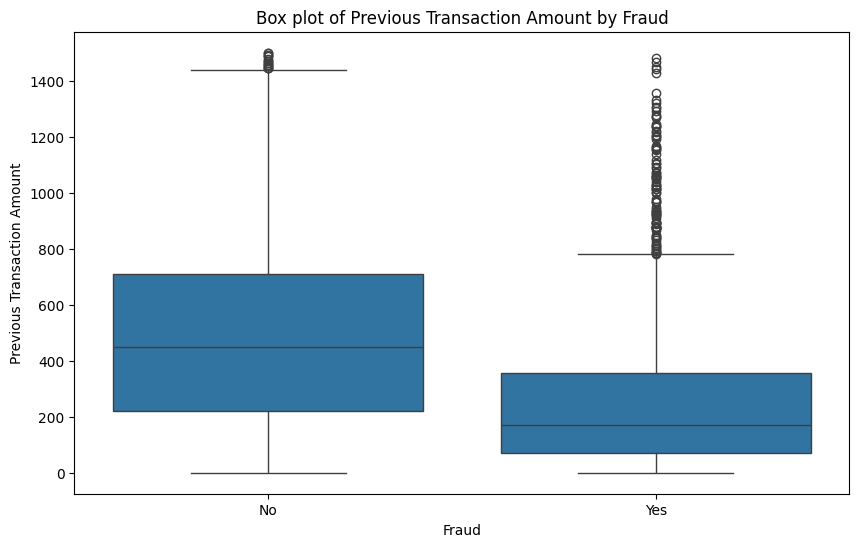

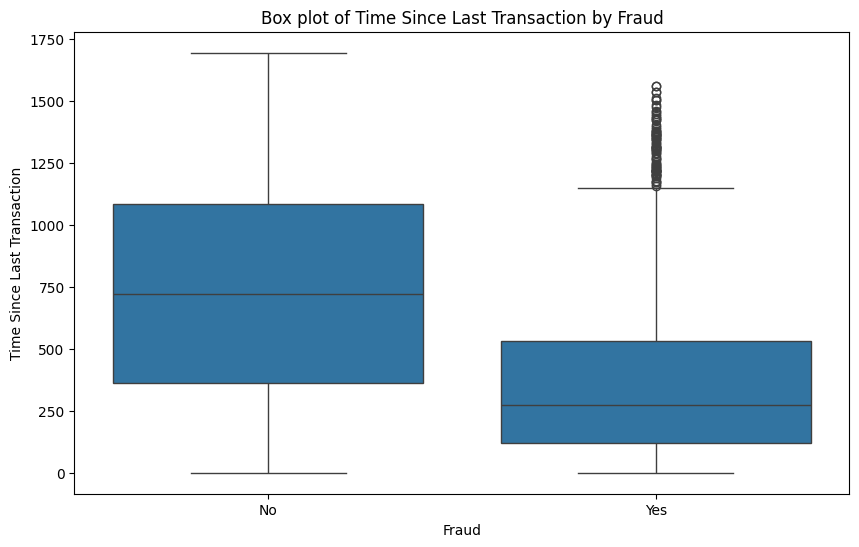

In [25]:
numerical_features = ['Transaction Amount',	"Previous Transaction Amount", 'Time Since Last Transaction']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fraud', y=feature, data=df)
    plt.title(f'Box plot of {feature} by Fraud')
    plt.show()


Ok so basically there are large differences in all of them, so it will be good to look at all of the numerical data for our model.
The idenified why x variables are customer id, location, transcation ammount, previous transation amount, and time since last transcation

(array([19358., 19359., 19360., 19361., 19362., 19363., 19364., 19365.]),
 [Text(19358.0, 0, '2023-01-01'),
  Text(19359.0, 0, '2023-01-02'),
  Text(19360.0, 0, '2023-01-03'),
  Text(19361.0, 0, '2023-01-04'),
  Text(19362.0, 0, '2023-01-05'),
  Text(19363.0, 0, '2023-01-06'),
  Text(19364.0, 0, '2023-01-07'),
  Text(19365.0, 0, '2023-01-08')])

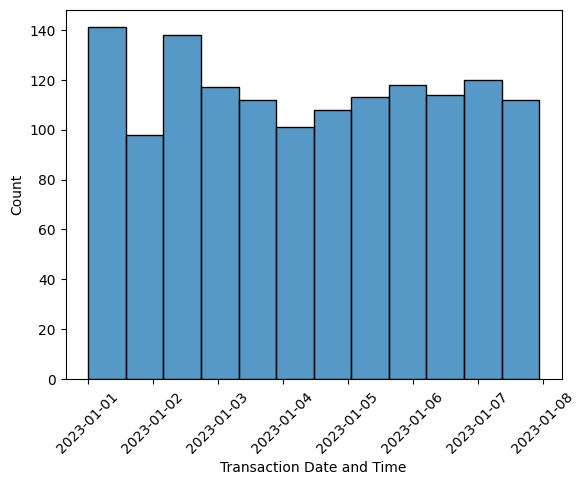

In [26]:
sns.histplot (x=Fraud_y['Transaction Date and Time'])
plt.xticks(rotation=45)

(array([19358., 19359., 19360., 19361., 19362., 19363., 19364., 19365.]),
 [Text(19358.0, 0, '2023-01-01'),
  Text(19359.0, 0, '2023-01-02'),
  Text(19360.0, 0, '2023-01-03'),
  Text(19361.0, 0, '2023-01-04'),
  Text(19362.0, 0, '2023-01-05'),
  Text(19363.0, 0, '2023-01-06'),
  Text(19364.0, 0, '2023-01-07'),
  Text(19365.0, 0, '2023-01-08')])

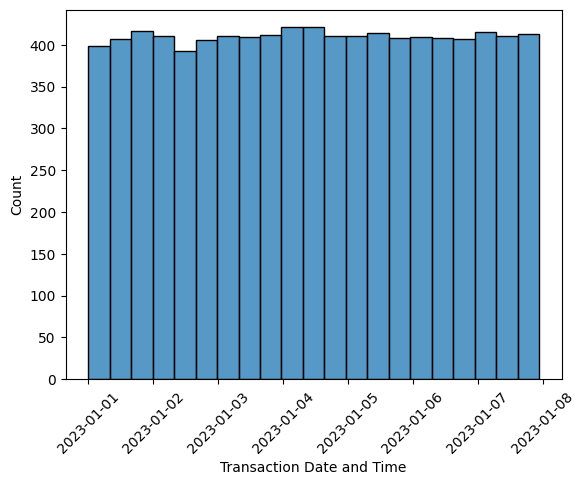

In [27]:
sns.histplot (x=Fraud_n['Transaction Date and Time'])
plt.xticks(rotation=45)

clearly there are dates with more fraud happening, I am not sure how to solve for this, just because the date will not happen again, it would be better to look at hour 

In [28]:
#So let's start feature engineering

In [29]:
#isolate the hour of the day to assess the time of day, makes new column of the hours 
df["hour"]= df["Transaction Date and Time"].apply(lambda x:x.hour)

In [30]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,0
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,0
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,0
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,0
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,0


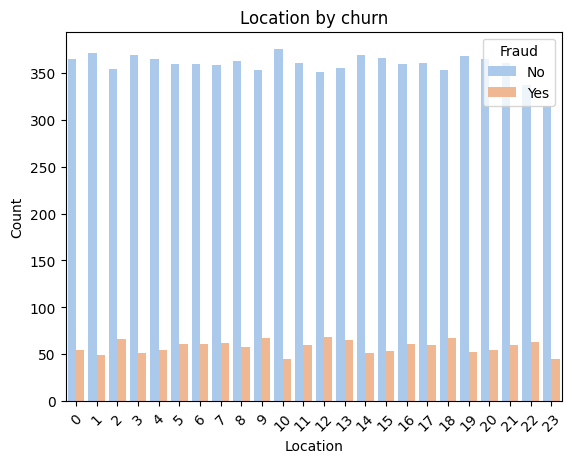

In [31]:
#So let's start feature engineering
sns.countplot( x="hour", hue="Fraud", data=df, palette='pastel')
plt.title("Location by churn")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [32]:
#looking at the categoical variable breakdown 
hour_distribution = df.groupby(['Fraud','hour']).size().unstack(fill_value=0)
hour_distribution_percentage = hour_distribution.div(hour_distribution.sum(axis=1), axis=0) * 100
print(hour_distribution_percentage)

hour         0         1         2         3         4         5         6   \
Fraud                                                                         
No     4.240242  4.309944  4.112454  4.286710  4.240242  4.170539  4.170539   
Yes    3.951149  3.520115  4.741379  3.663793  3.951149  4.382184  4.382184   

hour         7         8         9   ...        14        15        16  \
Fraud                                ...                                 
No     4.158922  4.205390  4.100836  ...  4.286710  4.251859  4.170539   
Yes    4.454023  4.166667  4.813218  ...  3.663793  3.879310  4.382184   

hour         17        18        19        20        21        22        23  
Fraud                                                                        
No     4.182156  4.100836  4.275093  4.240242  4.182156  3.914963  3.659387  
Yes    4.310345  4.813218  3.735632  3.951149  4.310345  4.525862  3.232759  

[2 rows x 24 columns]


In [33]:
#looking at fraud and not fraud independently 
Fraud_y = df[df['Fraud']=="Yes"]
Fraud_n = df[df['Fraud']=="No"]

In [34]:
Fraud_y.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour
13,14,2482,856.362115,2023-01-01 00:13:00,Groceries,Houston,36.515172,170.657109,mobile,Yes,0
39,40,1474,1052.211001,2023-01-01 00:39:00,Electronics,Los Angeles,183.630874,535.274618,mobile,Yes,0
47,48,2806,338.605096,2023-01-01 00:47:00,Clothing,Chicago,292.361587,1218.527369,desktop,Yes,0
48,49,1189,1211.134671,2023-01-01 00:48:00,Groceries,San Francisco,336.289129,84.284262,desktop,Yes,0
51,52,4005,355.772351,2023-01-01 00:51:00,Groceries,Houston,147.844470,81.471113,desktop,Yes,0


<Axes: xlabel='hour', ylabel='Count'>

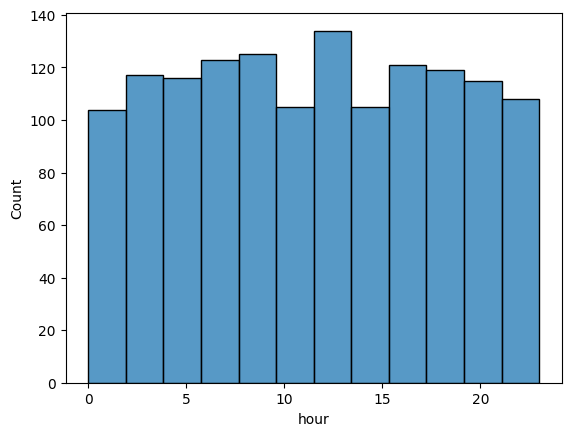

In [35]:
sns.histplot (x=Fraud_y['hour'])

<Axes: xlabel='hour', ylabel='Count'>

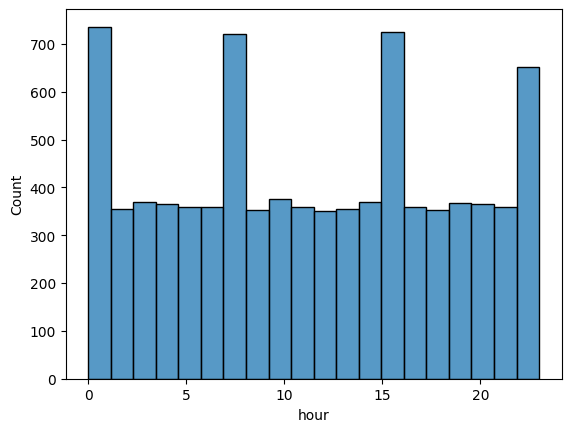

In [36]:
sns.histplot (x=Fraud_n['hour'])

There is a clear difference in the hour of the day in which fraud does and does not occur, this will be going into the model 

In [37]:
#seeing if difference in transaction means anything 
df["difference in amount"] = df["Transaction Amount"] - df["Previous Transaction Amount"]

In [38]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour,difference in amount
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,0,79.973391
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,0,66.826182
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,0,233.235965
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,0,-353.059489
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,0,40.791565


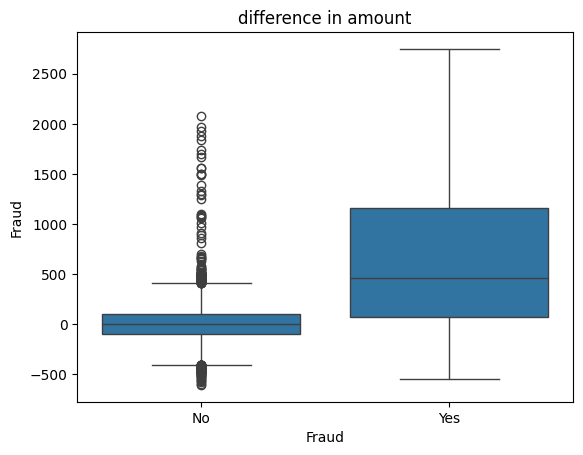

In [39]:
#Checking number of Y across X
sns.boxplot(x='Fraud', y='difference in amount', data=df)
plt.xlabel('Fraud')
plt.ylabel('Fraud')
plt.title('difference in amount')
plt.show()

In [40]:
#looking at fraud and not fraud independently 
Fraud_y = df[df['Fraud']=="Yes"]
Fraud_n = df[df['Fraud']=="No"]

<Axes: xlabel='difference in amount', ylabel='Count'>

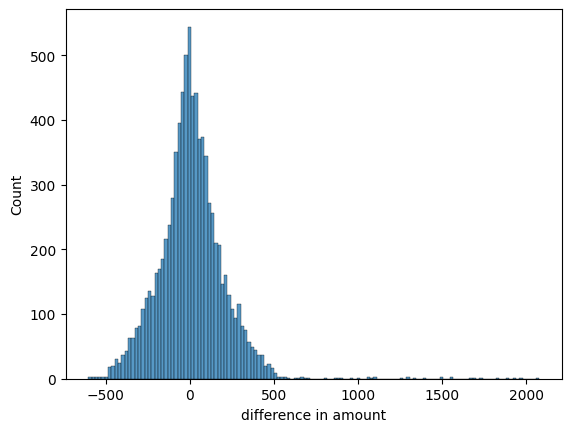

In [41]:
sns.histplot (x=Fraud_n['difference in amount'])

<Axes: xlabel='difference in amount', ylabel='Count'>

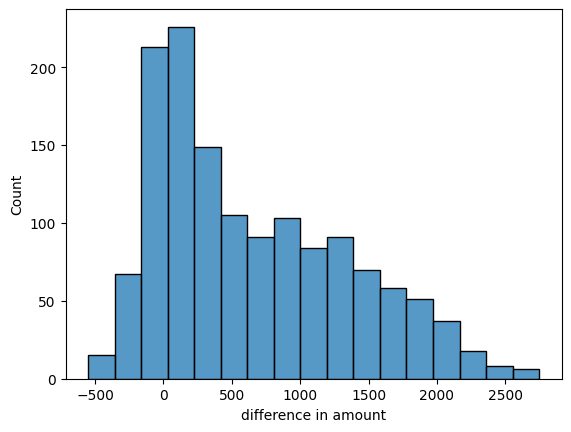

In [42]:
sns.histplot (x=Fraud_y['difference in amount'])

In [43]:
Fraud_y['difference in amount'].describe()

count    1392.000000
mean      654.454479
std       696.350245
min      -550.634277
25%        70.471977
50%       458.153616
75%      1163.930070
max      2747.464240
Name: difference in amount, dtype: float64

In [44]:
Fraud_n['difference in amount'].describe()

count    8608.000000
mean        8.543866
std       194.896970
min      -604.892116
25%       -96.417578
50%         1.000000
75%       107.151517
max      2077.509299
Name: difference in amount, dtype: float64

There is a huge difference in the differences between transaction amounts, this will also inform our model 

In [45]:
#Getting things ready for the model 
#Convert Output variable to Binary
df['Fraud'] = df['Fraud'].replace({'No': 0, 'Yes': 1})

/var/folders/g9/nsrxf98x7b3b8m4gk4095qn80000gn/T/ipykernel_58875/2460087305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fraud'] = df['Fraud'].replace({'No': 0, 'Yes': 1})


Fraud(Original Features):
difference in amount           0.577037
Transaction Amount             0.360897
hour                           0.005096
Customer ID                   -0.009120
Transaction ID                -0.011482
Previous Transaction Amount   -0.236843
Time Since Last Transaction   -0.268011
Name: Fraud, dtype: float64


/var/folders/g9/nsrxf98x7b3b8m4gk4095qn80000gn/T/ipykernel_58875/3061111830.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')


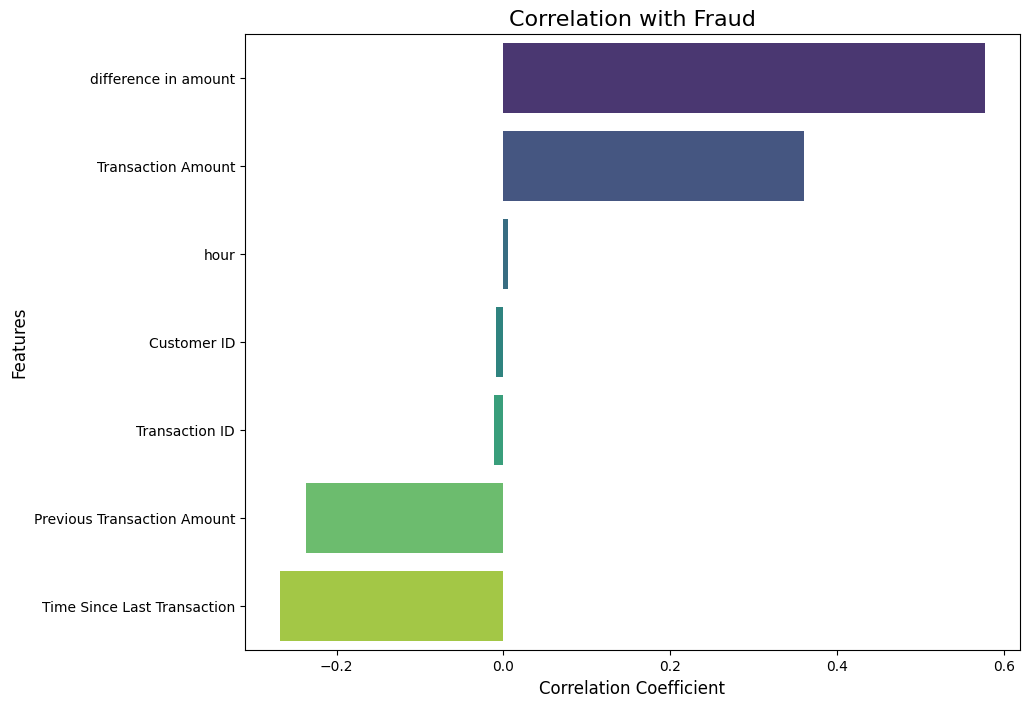

In [46]:
# Correlation Analysis / Matrix, choose features based off it 
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

# Correlation with the target variable
attr_corr = corr_matrix['Fraud'].drop('Fraud').sort_values(ascending=False)
print("Fraud(Original Features):")
print(attr_corr)

# Bar plot for correlation with Fraud
plt.figure(figsize=(10, 8))
sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')
plt.title('Correlation with Fraud', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

So it's now time to build our model, 
based on the above we have found that the things that will most impact the model are 
-location 
-hour (kind of)
-difference transaction amount
-time since last transcation 

-the output variable is going to be fraud yes or no 

In [47]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour,difference in amount
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,0,0,79.973391
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,0,0,66.826182
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,0,0,233.235965
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,0,0,-353.059489
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,0,0,40.791565


In [48]:
#to make the model easier for me, I am going to make a numerical location category 
def location_number(x):
    if x == "Los Angeles":
        return 1
    if x == 'Houston':
        return 2
    if x == 'San Francisco':
        return 3
    if x == 'Chicago':
        return 4
    if x == 'New York':
        return 5
    else:
        return 0
    
df['location_cat'] = df['Location'].apply(location_number)

In [49]:
#looking at the categoical variable breakdown 
loc_distribution = df.groupby(['Fraud','Location']).size().unstack(fill_value=0)
loc_distribution_percentage = loc_distribution.div(loc_distribution.sum(axis=1), axis=0) * 100
print(loc_distribution_percentage)

Location    Chicago    Houston  Los Angeles   New York  San Francisco
Fraud                                                                
0         19.830390  20.051115    20.608736  19.365706      20.144052
1         14.942529  46.479885    13.074713  14.295977      11.206897


In [50]:
#looking at the categoical variable breakdown 
loc_distribution = df.groupby(['Fraud','location_cat']).size().unstack(fill_value=0)
loc_distribution_percentage = loc_distribution.div(loc_distribution.sum(axis=1), axis=0) * 100
print(loc_distribution_percentage)

location_cat          1          2          3          4          5
Fraud                                                              
0             20.608736  20.051115  20.144052  19.830390  19.365706
1             13.074713  46.479885  11.206897  14.942529  14.295977


In [51]:
#the numbers are not the same, so like might not us this might do a get dummies instead. 

In [52]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour,difference in amount,location_cat
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,0,0,79.973391,1
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,0,0,66.826182,2
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,0,0,233.235965,3
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,0,0,-353.059489,1
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,0,0,40.791565,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  int64         
 1   Customer ID                  10000 non-null  int64         
 2   Transaction Amount           10000 non-null  float64       
 3   Transaction Date and Time    10000 non-null  datetime64[ns]
 4   Merchant Category            10000 non-null  object        
 5   Location                     10000 non-null  object        
 6   Previous Transaction Amount  10000 non-null  float64       
 7   Time Since Last Transaction  10000 non-null  float64       
 8   Device Type                  10000 non-null  object        
 9   Fraud                        10000 non-null  int64         
 10  hour                         10000 non-null  int64         
 11  difference in amount         10000 non-nul

# Model Builing

In [54]:
# build our pipeline that incldes these transformations

numerical = ['hour',"difference in amount","Time Since Last Transaction","location_cat"]

target = ['Fraud']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[numerical], df[target], test_size=0.3, random_state=123)


In [56]:
# build pipeline, transformers
# apply one hot encoding, 
# Minmax scaling makes it so that you can better understand the data
# prevent one hot encoder from returning a sparse matrix (GuassianNB will throw an error otherwise)
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

In [57]:
#Build Preprocessor
preprocessor = ColumnTransformer(transformers = [('num', numTransformer, numerical)])

In [58]:
# Define the models for testing
knn = KNeighborsClassifier()
nb = GaussianNB( )
Rfr = RandomForestClassifier()
LG = LogisticRegression()
DT = DecisionTreeClassifier()
svm = SVC()



GaussianNB()

In [59]:
# cross validation to determine in general which model works best for the given problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(LG, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
DT_scores = cross_val_score(DT, X_train, y_train, scoring='f1', cv=5)
Rfr_scores = cross_val_score(Rfr, X_train, y_train, scoring='f1', cv=5)
svm_scores = cross_val_score(svm, X_train, y_train, scoring='f1', cv=5)

/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y

In [60]:
print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))
print(np.mean(DT_scores))
print(np.mean(Rfr_scores))
print(np.mean(svm_scores))

0.6414789651096118
0.6210189499844672
0.6584136166633563
0.5206376212420205
0.6537635824520986
0.6331858231944039


ok so GaussianNB gave us the best score, so we will be using it to bulid our model 

In [61]:
nb = Pipeline(steps = [('preprocessor', preprocessor), ('nb', GaussianNB())])
# fit
nb.fit(X_train, y_train)
# predict
pred = nb.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')


nb_report = classification_report(y_test, pred)

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

print(nb_report)

#ok so the recall is bad, so let's try another model... let's try random forestt

/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was 

Accuracy: 0.926
Precision: 0.8942731277533039
Recall Score: 0.5062344139650873
F1 Score: 0.6464968152866242
Cross Validation F1 Scores: [0.60810811 0.69620253 0.64052288 0.65359477 0.64516129 0.66666667
 0.63225806 0.70807453 0.68789809 0.62337662]
Mean cross validation F1 Score: 0.6561863555027966
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2599
           1       0.89      0.51      0.65       401

    accuracy                           0.93      3000
   macro avg       0.91      0.75      0.80      3000
weighted avg       0.92      0.93      0.92      3000



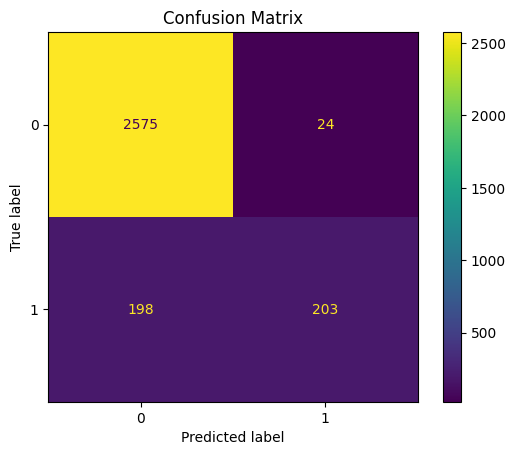

In [62]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [63]:
#ok so the recall is bad, so let's try another model... let's try random forest

#we need to find the best features for it 
# Define the hyperparameter grid
param_grid = {
    'classifier': ['priors', 'var_smoothing']
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(nb, param_grid, cv=5, verbose=1, scoring='f1')


In [65]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(df[numerical], df[target], test_size=0.3, random_state=123)


In [66]:
rfr = Pipeline(steps = [('preprocessor', preprocessor), ('rfr', RandomForestClassifier())])
# fit
rfr.fit(X_train_r, y_train_r)

/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['difference in amount',
                                                   'Time Since Last '
                                                   'Transaction',
                                                   'location_cat'])])),
                ('rfr', RandomForestClassifier())])

In [67]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [68]:
# Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search = GridSearchCV(estimator=Rfr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

In [69]:
# Fit GridSearchCV
grid_search.fit(X_train_r, y_train_r)

/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Train the final model with the best parameters
final_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=100,
    random_state=42)
final_classifier.fit(X_train_r, y_train_r)

/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [ ]:
# Evaluate the final model on the test set
y_pred_r = final_classifier.predict(X_test_r)

In [ ]:
rf_report=classification_report(y_test_r, y_pred_r)

print(rf_report)

# performance metrics (binary)
accuracy = accuracy_score(y_test_r, y_pred_r)
print("Accuracy:", accuracy)
precision = precision_score(y_test_r, y_pred_r, average='binary')
print("Precision:", precision)
recall = recall_score(y_test_r, y_pred_r, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test_r, y_pred_r, average='binary')
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2599
           1       0.87      0.54      0.66       401

    accuracy                           0.93      3000
   macro avg       0.90      0.76      0.81      3000
weighted avg       0.92      0.93      0.92      3000

Accuracy: 0.927
Precision: 0.8669354838709677
Recall Score: 0.5361596009975063
F1 Score: 0.662557781201849


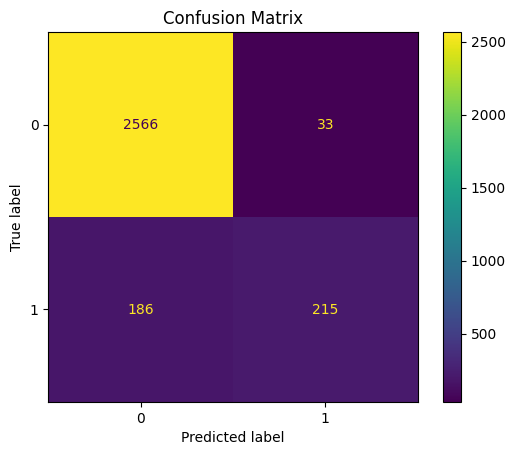

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_r, y_pred_r)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour,difference in amount,location_cat
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,0,0,79.973391,1
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,0,0,66.826182,2
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,0,0,233.235965,3
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,0,0,-353.059489,1
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,0,0,40.791565,1
